# <center>Assignment : Simple Linear Regression</center>

__Problem Statement__<br>

1) Delivery_time -> Predict delivery time using sorting time <br>
2) Salary_hike -> Build a prediction model for Salary_hike<br>

__<hr style="border:0.5px solid green">__<br>

Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [1]:
#importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

 ##  I. Delivery_time -> Predict delivery time using sorting time

In [2]:
#importing llibraries to read data
data_del_time=pd.read_csv("delivery_time.csv")

#### Data explore to understand basics of data

In [3]:
data_del_time.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


##### data set has two columns Delivery time and sorting time, we are supposed to predict delivey time based on sorting time

In [4]:
# number of rows and columns
data_del_time.shape

(21, 2)

##### data set has 21 rows and 2 columns

In [5]:
# getting basic info on data

In [6]:
data_del_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


##### there are no null values, data type for Delivery time is float and for sorting is integer

In [7]:
# getting basics statistical information on data set
data_del_time.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


##### statistical information we get:<br>
__for Delivery Time__<br>
- 1st quartile: 13.5
- 3rd quartile: 19.7
- Min value: 8.0
- Max value: 29.00
- IQR: 19.7-13.5 = 6.2
- mean: 16.79
- std: 5.07
<br>

__for Sorting Time__<br>
- 1st quartile: 4
- 3rd quartile: 8
- Min value: 2
- Max value: 10
- IQR: 8-4 =4
- mean:6.19
- std: 5.54

In [8]:
# changing column names Delivery time to Delivery_time and Sorting time to Sorting_time
data_del_time.rename(columns={'Delivery Time':"Delivery_Time","Sorting Time":"Sorting_Time"}, inplace=True)
data_del_time.head()

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


Text(0, 0.5, 'Delivery Time')

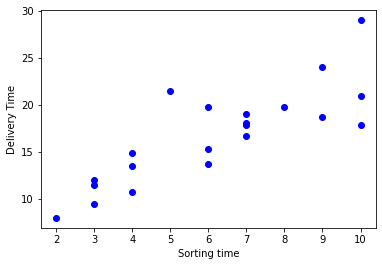

In [9]:
# creating scatter plot to see if there is any linear relation between Sorting time and Delivery time
#importing matplot library
import matplotlib.pyplot as plt

plt.plot(data_del_time['Sorting_Time'], data_del_time['Delivery_Time'], "bo")
plt.xlabel("Sorting time")
plt.ylabel("Delivery Time")

#### there is strong positive relation between between Sorting_Time and Delivery_Time

In [10]:
#check correlation between Sorting_Time and Delivery_Time
data_del_time.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


#### the correlation is + 0.826 i.e. there strong correlation of 82.6% between Sorting_Time and Delivery_Time

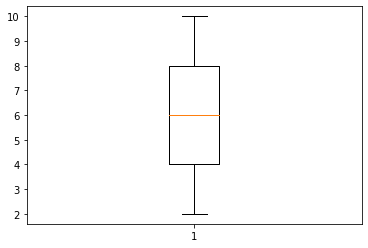

In [11]:
plt.boxplot(data_del_time['Sorting_Time'])
plt.show()

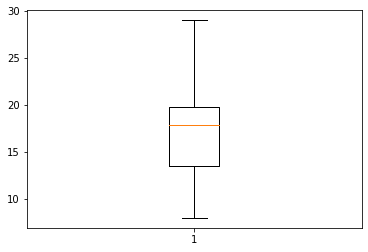

In [12]:
plt.boxplot(data_del_time['Delivery_Time'])
plt.show()

### Check more on data using distirbution plot from seaborn

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting_Time', ylabel='Density'>

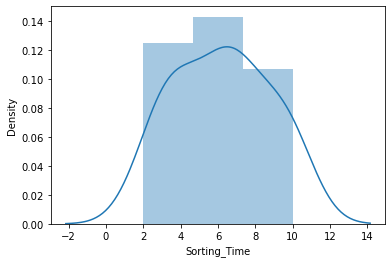

In [13]:
import seaborn as sns

sns.distplot(data_del_time['Sorting_Time'])

#### for sorting time: we notice that 50% of data is between 4 and 8 and has no tails.

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery_Time', ylabel='Density'>

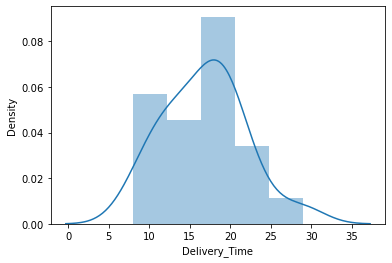

In [14]:
sns.distplot(data_del_time['Delivery_Time'])

#### for sorting time: we notice that 50% of data is between 10 and 20 and as per statis information ealier it should be beteen 13.5 and 19.7

__Fitting a Linear Regression Model__

In [15]:
import statsmodels.formula.api as smf
deliver_time_model = smf.ols("Delivery_Time~Sorting_Time",data = data_del_time).fit()

<AxesSubplot:xlabel='Sorting_Time', ylabel='Delivery_Time'>

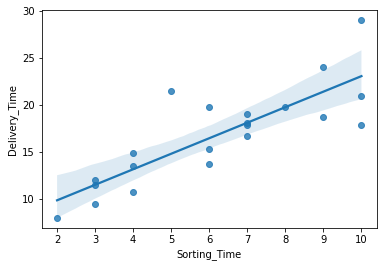

In [16]:
#creating regression plot

sns.regplot(x="Sorting_Time", y="Delivery_Time", data=data_del_time)

#### regression plot showing positive regression between Sorting_Time and Delivery_Time

In [17]:
#get all results of Simple linear fit
deliver_time_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 16 May 2022   Prob (F-statistic):           3.98e-06
Time:                        19:10:01   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Results Summary__<br>
__beta0__  is 6.5827<br>
__beta1__ is 1.6490<br>
__R-Squared__ is 0.682 indicates __model is 68.2% accurate__<br>
__Degree of freem for errors(DFResidual)__ is 19<br>
__degree of freedom for modelel__ is 1<br>
__P value__ is 0.00 (is less than 0.05) meaning this __is siginifcant parameter__ for Sorting_Time

### <font color='red'>Accuracy</font> of the linear model is only 0.682 i.e. <font color='red'>68.2 % only</font>, we will need to apply transoformation to the model and identify which trnasformation imporves the accuracy of model.

In [18]:
# calculating error (resid)  and resid_Pearson to standardize errors (convert errors to their z scores)
deliver_time_model.resid 
deliver_time_model.resid_pearson

array([-0.70630355,  0.10943679,  1.11524837,  0.87774154,  2.01950985,
       -0.383949  ,  0.2978383 , -0.69160484, -1.76255624, -0.9110735 ,
        0.01877637, -0.82756157, -0.49264758, -0.0101515 ,  0.17043364,
        0.5796396 , -0.92911167, -0.00540844, -0.64082979, -0.10081191,
        2.27338512])

In [19]:
#predicting 
linear_pred = deliver_time_model.predict(data_del_time['Sorting_Time'])
linear_pred

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [20]:
# calucate RootMeanSquareError(rmse)
rmse_linearModel = np.sqrt(np.mean((np.array(data_del_time['Delivery_Time'])-np.array(linear_pred))**2))
rmse_linearModel

2.7916503270617654

Text(0, 0.5, 'Delivery_Time')

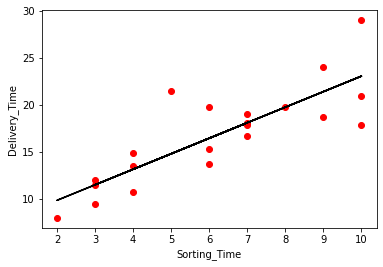

In [21]:
#plotting scatter plot with actual values(in red)  and predicted values(black)
import matplotlib.pylab as plt
plt.scatter(x=data_del_time['Sorting_Time'],y=data_del_time['Delivery_Time'],color='red')
plt.plot(data_del_time['Sorting_Time'],linear_pred,color='black')
plt.xlabel('Sorting_Time')
plt.ylabel('Delivery_Time')

### Analysis till here: we have strong correlation between Sorting time and Delivery time , however we need to apply transformation to imporive model accuracy<br>

Accuracy : 68.2% <br>
RMSE_Linear: 2.7916503270617654

### Applying Transoformations to check which transformation improves accuracy

### Log Transformation

In [22]:
log_model = smf.ols('Delivery_Time~np.log(Sorting_Time)',data=data_del_time).fit()
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Mon, 16 May 2022   Prob (F-statistic):           2.64e-06
Time:                        19:10:01   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(Sorting_Time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Results Summary__
__beta0__ is 1.15972<br>
__beta1__ is 9.0434<br>
__R-Squared__ is 0.695 indicates model is 69.5% accurate which has slight improvement over simple linear model<br>
__P value is 0.00 (is less than 0.05)__ meaning this is siginifcant parameter for Sorting_Time

In [23]:
# calculating resid_Pearson to standardize errors (convert errors to their z scores)
log_model.resid 
log_model.resid_pearson 

array([-0.34207012, -0.06839109,  0.83061001,  1.0335774 ,  2.44206469,
       -0.70066414,  0.08444506, -0.55504813, -1.42092236, -0.79351107,
       -0.046959  , -1.02543743, -0.72295404,  0.14098557,  0.3254345 ,
        0.41187217, -1.2574911 , -0.22528994,  0.19903082, -0.32273466,
        2.01345289])

In [24]:
pred_log = deliver_time_model.predict(data_del_time['Sorting_Time'])
pred_log


0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [25]:
#calucalting overall error in model after log transformation
rmse_log = np.sqrt(np.mean((np.array(data_del_time['Delivery_Time'])-np.array(pred_log))**2))
rmse_log

2.7916503270617654

### 
R-Squared: 0.695 or  69.5% <br>
rmse_log: 2.7916503270617654 which is same as rmse of linear model calcuated earlier.


Text(0, 0.5, 'Delivery_Time')

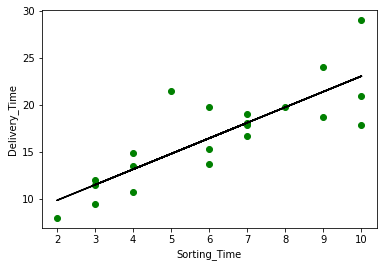

In [26]:
#plotting scatter plot with actual values(in green)  and predicted values(black)
import matplotlib.pylab as plt
plt.scatter(x=data_del_time['Sorting_Time'],y=data_del_time['Delivery_Time'],color='green')
plt.plot(data_del_time['Sorting_Time'],pred_log,color='black')
plt.xlabel('Sorting_Time')
plt.ylabel('Delivery_Time')

### Analysis till here: we have strong correlation between Sorting time and Delivery time , however we need to apply transformation to imporive model accuracy<br>
R-Squared: 0.695 or 69.5%
rmse_log: 2.7916503270617654 which is same as rmse of linear model calcuated earlier.

### Apply Exponential transformation

In [27]:
Exponential_model = smf.ols('np.log(Delivery_Time)~Sorting_Time',data=data_del_time).fit()
Exponential_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_Time)   R-squared:                       0.711
Model:                               OLS   Adj. R-squared:                  0.696
Method:                    Least Squares   F-statistic:                     46.73
Date:                   Mon, 16 May 2022   Prob (F-statistic):           1.59e-06
Time:                           19:10:02   Log-Likelihood:                 7.7920
No. Observations:                     21   AIC:                            -11.58
Df Residuals:                         19   BIC:                            -9.495
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1214      0.103     20.601      0.000       1.906       2.337
Sorting_Time     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Results Summary__<br>
__beta0__  is 2.1214<br>
__beta1__ is 0.1056<br>
__R-Squared__ is 0.711 indicates __model is 71.1% accurate and has given better Rquared than linear and log model__<br>
__Degree of freem for errors(DFResidual)__ is 19<br>
__degree of freedom for modelel__ is 1<br>
__P value__ is 0.00 (is less than 0.05) meaning this __is siginifcant parameter__ for Sorting_Time

####  prediction after applying exponential transform will require to take exponential of Delivery time as model will predict log (Delivery time)

In [28]:
# prediction
exponential_model_interim_prediction=Exponential_model.predict(data_del_time['Sorting_Time'])
# taking exponential of predicted values
exponential_model_predict=np.exp(exponential_model_interim_prediction)
exponential_model_predict

0     23.972032
1     12.725123
2     15.716034
3     21.570707
4     23.972032
5     15.716034
6     17.465597
7     11.450423
8     23.972032
9     21.570707
10    19.409927
11    12.725123
12    17.465597
13    11.450423
14    11.450423
15    12.725123
16    15.716034
17    17.465597
18    10.303411
19    17.465597
20    14.141728
dtype: float64

In [29]:
# calcualting resid and reside_pearson


In [30]:
Exponential_model.resid
Exponential_model.resid_pearson

array([-0.75408795,  0.33675889,  1.3016092 ,  0.60797197,  1.08475764,
       -0.13425573,  0.47972269, -1.06383166, -1.66402537, -0.79839415,
        0.12198057, -0.9609301 , -0.26219179,  0.02461332,  0.28130094,
        0.89124014, -0.7613643 ,  0.20640995, -1.44153627,  0.11763994,
        2.38661208])

In [31]:
# calcualte over error of exponential model
rmse_exponential=np.sqrt(np.mean((np.array(data_del_time['Delivery_Time'])-np.array(exponential_model_predict))**2))
rmse_exponential

2.9402503230562007

Text(0, 0.5, 'Delivery_Time')

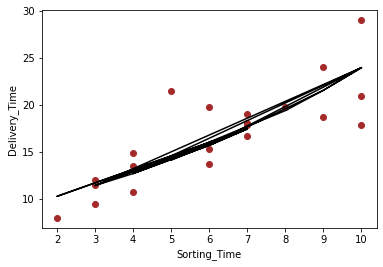

In [32]:
#plotting scatter plot with actual values(in Brown)  and predicted values(black)
import matplotlib.pylab as plt
plt.scatter(x=data_del_time['Sorting_Time'],y=data_del_time['Delivery_Time'],color='Brown')
plt.plot(data_del_time['Sorting_Time'],exponential_model_predict,color='black')
plt.xlabel('Sorting_Time')
plt.ylabel('Delivery_Time')

### Analysis till here: we have strong correlation between Sorting time and Delivery time , this model has shown better accuracy of 71.1 % however rmse has gone up slightly to 2.9402503230562007 from 2.7916503270617654

### Apply mix mode model ie mixing exponential model and squared model

In [33]:
# adding Sorting_Time_Squared to dataset this column shall carry squared values of Sorting_Time
data_del_time['Sorting_Time_Squared']=data_del_time['Sorting_Time']**2
data_del_time.head()

,Delivery_Time,Sorting_Time,Sorting_Time_Squared
0,21.00,10,100
1,13.50,4,16
2,19.75,6,36
3,24.00,9,81
4,29.00,10,100


In [34]:
# build quad model
quad_model=smf.ols('np.log(Delivery_Time)~Sorting_Time+Sorting_Time_Squared',data=data_del_time).fit()

In [35]:
quad_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_Time)   R-squared:                       0.765
Model:                               OLS   Adj. R-squared:                  0.739
Method:                    Least Squares   F-statistic:                     29.28
Date:                   Mon, 16 May 2022   Prob (F-statistic):           2.20e-06
Time:                           19:10:02   Log-Likelihood:                 9.9597
No. Observations:                     21   AIC:                            -13.92
Df Residuals:                         18   BIC:                            -10.79
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.6997      0.228      7.441      0.000       1.220       2.180
Sorting_Time             0.2659      0.080      3.315      0.004       0.097       0.434
Sorting_Time_Squared    -0.0128      0.006     -2.032      0.057      -0.026       0.000
==============================================================================
Omnibus:                        2.548   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                1.777
Skew:                           0.708   Prob(JB):                        0.411
Kurtosis:                       2.846   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Results Summary__<br>
__beta0__  is 1.6997<br>
__beta1__ is 0.2659<br>
__beta2__ is -0.0128<br>
__R-Squared__ is 0.765 indicates __model is 76.5% accurate and has given better Rquared than linear and log  and Exponential model<br>
__Degree of freem for errors(DFResidual)__ is 18<br>
__degree of freedom for modelel__ is 1<br>
__P value Beta 1(Sorting_Time)__ is 0.004 (less than 0.05)  this is siginificant variable to predict Delivery time<br>
__P value Beta 2(Sorting_Time_Squared)__ is 0.057 (slightly over 0.05, still siginificant variable to predict Delviery Time

In [36]:
# predicting values,also we need to take exponential for value predicted by model
quad_model_predict_intermediate=quad_model.predict(data_del_time)
quad_model_predict=np.exp(quad_model_predict_intermediate)
quad_model_predict

0     21.646921
1     12.909227
2     16.995933
3     21.176938
4     21.646921
5     16.995933
6     18.764526
7     10.825502
8     21.646921
9     21.176938
10    20.191891
11    12.909227
12    18.764526
13    10.825502
14    10.825502
15    12.909227
16    16.995933
17    18.764526
18     8.847949
19    18.764526
20    15.003730
dtype: float64

In [37]:
#calucation resid and resid_pearson


In [38]:
quad_model.resid
quad_model.resid_pearson

array([-0.18653701,  0.27510944,  0.92331151,  0.76937448,  1.79789238,
       -0.62623272,  0.0766711 , -0.80301506, -1.16851536, -0.74833548,
       -0.11118848, -1.12531927, -0.72398172,  0.37160353,  0.64861345,
        0.8734897 , -1.3029903 , -0.21828016, -0.61938087, -0.31407821,
        2.21178906])

In [39]:
# overall error in quad_model
rmse_quad=np.sqrt(np.mean((np.array(data_del_time['Delivery_Time'])-np.array(quad_model_predict))**2))
rmse_quad

2.799041988740927

Text(0, 0.5, 'Delivery_Time')

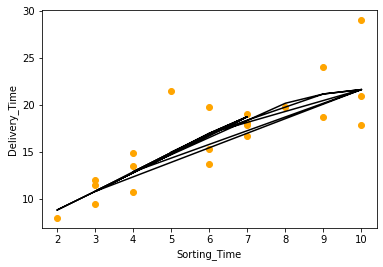

In [60]:
#plotting scatter plot with actual values(in Brown)  and predicted values(black)
import matplotlib.pylab as plt
plt.scatter(x=data_del_time['Sorting_Time'],y=data_del_time['Delivery_Time'],color='Orange')
plt.plot(data_del_time['Sorting_Time'],quad_model_predict,color='black')
plt.xlabel('Sorting_Time')
plt.ylabel('Delivery_Time')

### this model has given accurcy of 76.5% with overall error as 2.799041988740927 


In [56]:
# compare all four models
data={'Model':pd.Series(['linearModel without Transformation','Log Transformation', 'Exponential Transformation','Mix Match Transformation']),
     'RMSE Value':pd.Series([rmse_linearModel,rmse_log,rmse_exponential,rmse_quad]),
     'R Squared':pd.Series([deliver_time_model.rsquared,log_model.rsquared,Exponential_model.rsquared,quad_model.rsquared])}

In [61]:
table=pd.DataFrame(data)
table

,Model,RMSE Value,R Squared
0,linearModel without Transformation,2.791650,0.682271
1,Log Transformation,2.791650,0.695443
2,Exponential Transformation,2.940250,0.710948
3,Mix Match Transformation,2.799042,0.764867


### from above table we observer that Mix Match model gives best R quared of 76.4% and error is less than Exponential model and similar to Log and model without trnasformaiton. So we cross verify Mix Match transformation.

#### cross verify the best model from above table using standarized error of model, itshould follow the rule: <br>
1. mean should be around 0
2. aproximate constant variation

Text(0, 0.5, 'Standard residual')

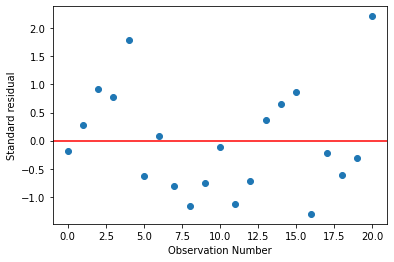

In [68]:
plt.scatter(np.arange(21),quad_model.resid_pearson)
plt.axhline(y=0,color="Red")
plt.xlabel('Observation Number')
plt.ylabel('Standard residual')

Text(0, 0.5, 'Standard residual')

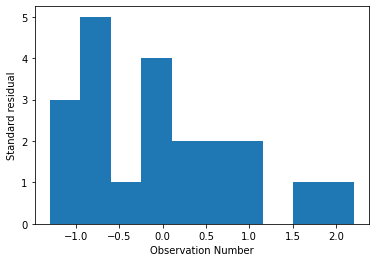

In [70]:
plt.hist(quad_model.resid_pearson)

plt.xlabel('Observation Number')
plt.ylabel('Standard residual')

### The above graph shows the mean is near 0 and variance is aproximately constant with outliers.

__<hr style="border:0.5px solid Blue">__<br>

 ## II Salary_hike -> Build a prediction model for Salary_hike

In [72]:
# reading salaries data
data_salary=pd.read_csv("Salary_Data.csv")

#### Data explore to understand basics of data

In [73]:
data_salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


#### Dataset has two columns YearsExperience and Salary, we need to build simple liner model to predict salary hike based on yearsExperience

In [74]:
# data shape to check number of rows and coulms
data_salary.shape

(30, 2)

#### dataset has 30 rows and 2 columns

In [75]:
# getting basic info on data
data_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


#### there are no null values and both columns have data types as float

In [76]:
# getting statistical info on data
data_salary.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


##### statistical information we get:<br>
__for YearsExperience__<br>
- 1st quartile: 3.2
- 3rd quartile: 7.7
- Min value: 1.1
- Max value: 10.5
- mean: 5.31
- std: 2.84
<br>

__for Salary__<br>
- 1st quartile: 56720.75
- 3rd quartile: 100544.75
- Min value: 37731.00
- Max value: 122391.00
- mean:76003.00
- std: 27414.43

Text(0, 0.5, 'Salary')

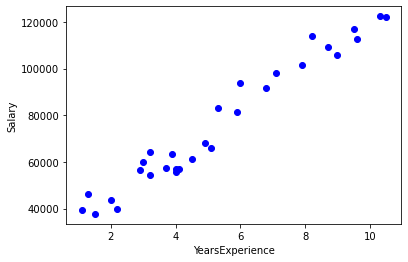

In [77]:
# creating scatter plot to see if there is any linear relation between Sorting time and Delivery time
#importing matplot library
import matplotlib.pyplot as plt

plt.plot(data_salary['YearsExperience'], data_salary['Salary'], "bo")
plt.xlabel("YearsExperience")
plt.ylabel("Salary")

#### The scatter plot shows there is +VE linear relation between yearsEperience and Salary i.e. with increase in experience salry increases. Thus its correlation expected to be positive

In [78]:
# check correlation
data_salary.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


#### Correlation between yearsExperience and Salary is +0.97.8 i.e. 97.8%, a strong positive correlation between the fields.

### Check more on data using distirbution plot from seaborn

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

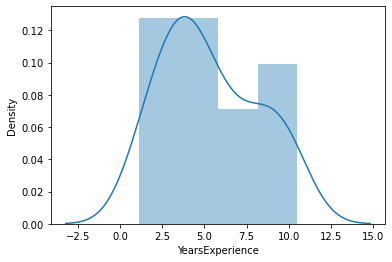

In [79]:
sns.distplot(data_salary['YearsExperience'])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

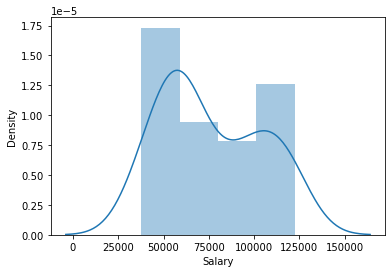

In [80]:
sns.distplot(data_salary['Salary'])

__Fitting a Linear Regression Model__

In [81]:
salary_hike_model = smf.ols("Salary~YearsExperience",data = data_salary).fit()

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

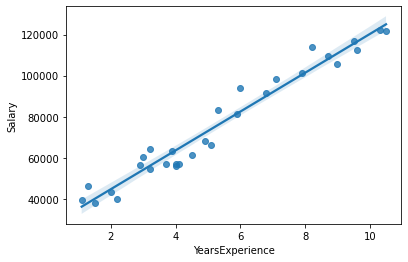

In [82]:
#creating regression plot

sns.regplot(x="YearsExperience", y="Salary", data=data_salary)

#### The Regression plot shows there is strong +ve linear relation between yearsEperience and Salary i.e. with increase in experience salry increases. Thus its correlation expected to be positive

In [84]:
#get all results of Simple linear fit
salary_hike_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 16 May 2022   Prob (F-statistic):           1.14e-20
Time:                        19:32:04   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Results Summary__<br>
__beta0__  is 2579<br>
__beta1__ is 9449.96<br>
__R-Squared__ is 0.957 indicates __model is 95.7% accurate__<br>
__Degree of freem for errors(DFResidual)__ is 28<br>
__degree of freedom for model__ is 1<br>
__P value__ is 0.00 (is less than 0.05) meaning this __is siginifcant parameter__ for Sorting_Time

# Predict for new data point

In [85]:
#Predict value of salray based on model
salary_predict_data=salary_hike_model.predict(data_salary['YearsExperience'])

In [86]:
salary_predict_data

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

In [88]:
# calculate overall error for model
rmse=np.sqrt(np.mean((np.array(data_salary['Salary'])-np.array(salary_predict_data))**2))
rmse

5592.043608760662

### the Squared is 95.7% however error is 5592.043608760662, we need not apply any transformation on this model as this only reduce error which may not have any significance.